<a href="https://colab.research.google.com/github/PMiAOiZD-Masha-Dasha-lit/PZ2/blob/main/%D0%9F%D0%972_237_%D0%949_%D0%921_%D0%9B%D0%B0%D0%B3%D1%83%D1%82%D0%BA%D0%B8%D0%BD%D0%B0_%D0%9F%D1%80%D0%BE%D0%BD%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Решим задачу линейного программирования и построим решение в графическом виде, используя библиотеку pulp

#**Шаг 1. Импортируем библиотеку pulp, а также другие библиотеки, которые будут нужны для решения**

In [1]:
!pip install pulp
from pulp import *
import matplotlib.pyplot as plt
import numpy as np
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 47.3 MB/s eta 0:00:00


$pulp$ - библиотека для линейного программирования, предоставляет простой интерфейс для формулировки и решения оптимизационных задач

$matplotlib.pyplot$ - библиотека для визуализации данных, позволяет строить графики и диаграммы

$numpy$ - фундаментальная библиотека для научных вычислений, используется для математических операций и работы с массивами

$time$ - стандартная библиотека для измерения времени выполнения операций

#**Шаг 2. Выпишем условие задачи - ограничения и целевую функцию**

In [2]:
print("F = x - 2y → min, max")
print("При ограничениях:")
print("5x + 3y ≥ 30")
print("x - y ≤ 3")
print("-3x + 5y ≤ 15")
print("x ≥ 0, y ≥ 0")

F = x - 2y → min, max
При ограничениях:
5x + 3y ≥ 30
x - y ≤ 3
-3x + 5y ≤ 15
x ≥ 0, y ≥ 0


#**Шаг 3. Найдём точки, при которых целевая функция будет минимальна, а также вычислим её значение**

#Помимо этого, нам нужно будет записать время выполнения минимизации, поэтому учтём время начала и конца выполнения алгоритма

In [3]:
print("МИНИМИЗАЦИЯ")
start = time.time()

x_min = LpVariable("x_min", lowBound=0)
y_min = LpVariable("y_min", lowBound=0)


problem_min = LpProblem('Minimization', LpMinimize)

# Целевая функция
problem_min += x_min - 2*y_min, "Целевая_функция"

# Ограничения
problem_min += 5*x_min + 3*y_min >= 30, "Ограничение1"
problem_min += x_min - y_min <= 3, "Ограничение2"
problem_min += -3*x_min + 5*y_min <= 15, "Ограничение3"


problem_min.solve()

x_min_val = x_min.varValue
y_min_val = y_min.varValue
f_min_val = value(problem_min.objective)

print(f"x = {x_min_val}")
print(f"y = {y_min_val}")
print(f"F_min = {f_min_val}")

end = time.time()
print(f"Время решения: {end - start:.5f} сек")
print()

МИНИМИЗАЦИЯ
x = 15.0
y = 12.0
F_min = -9.0
Время решения: 0.00908 сек



Библиотека Pulp использует симплекс-метод для решения задач линейного программирования. Процесс включает:

1. Формулировку задачи в стандартной форме

2. Построение начального допустимого решения

3. Итеративное улучшение решения путем перемещения по ребрам многогранника

4. Достижение оптимальной вершины

#**Шаг 4. Найдем точки, при которых функция будет максимальна и вычислим её значение. Аналогично, запишем время начала и конца обработки алгоритма**

In [4]:
print("МАКСИМИЗАЦИЯ")
start = time.time()

x_max = LpVariable("x_max", lowBound=0)
y_max = LpVariable("y_max", lowBound=0)

problem_max = LpProblem('Maximization', LpMaximize)

# Целевая функция
problem_max += x_max - 2*y_max, "Целевая_функция"

# Ограничения
problem_max += 5*x_max + 3*y_max >= 30, "Ограничение1"
problem_max += x_max - y_max <= 3, "Ограничение2"
problem_max += -3*x_max + 5*y_max <= 15, "Ограничение3"

problem_max.solve()

x_max_val = x_max.varValue
y_max_val = y_max.varValue
f_max_val = value(problem_max.objective)

print(f"x = {x_max_val}")
print(f"y = {y_max_val}")
print(f"F_max = {f_max_val}")

end = time.time()
print(f"Время решения: {end - start:.5f} сек")

МАКСИМИЗАЦИЯ
x = 4.875
y = 1.875
F_max = 1.125
Время решения: 0.01017 сек


Для максимизации используется тот же симплекс-метод, но с измененным направлением оптимизации. Алгоритм ищет вершину многогранника, в которой целевая функция принимает наибольшее значение.

#**Шаг 5. Построим решение в графическом виде, указав оптимальные точки**

ГРАФИК


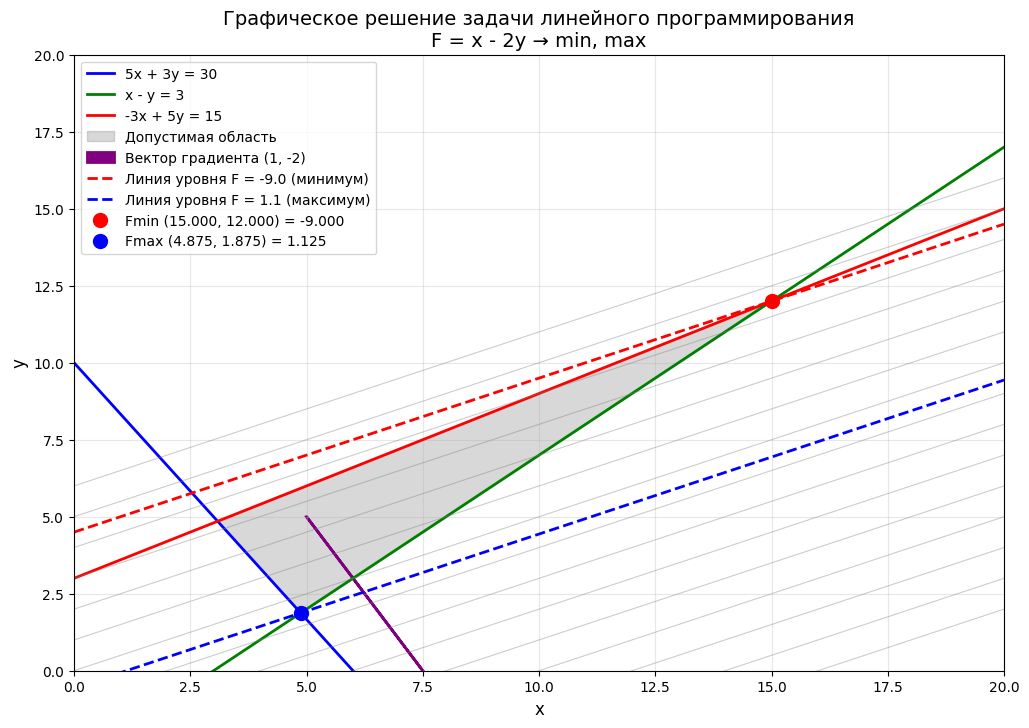

In [5]:
print("ГРАФИК")

x_vals = np.linspace(0, 20, 400)

# Ограничения
y1 = (30 - 5*x_vals) / 3
y2 = x_vals - 3
y3 = (15 + 3*x_vals) / 5

plt.figure(figsize=(12, 8))

# Линии ограничений
plt.plot(x_vals, y1, label='5x + 3y = 30', linewidth=2, color='blue')
plt.plot(x_vals, y2, label='x - y = 3', linewidth=2, color='green')
plt.plot(x_vals, y3, label='-3x + 5y = 15', linewidth=2, color='red')

y_min_bound = np.maximum(y1, y2)
plt.fill_between(x_vals, y_min_bound, y3,
                 where=(y_min_bound <= y3) & (x_vals >= 0) & (y_min_bound >= 0),
                 alpha=0.3, color='gray', label='Допустимая область')

gradient = np.array([1, -2])
gradient_scaled = gradient * 5

# Вектор градиента
start_point = np.array([5, 5])
plt.arrow(start_point[0], start_point[1], gradient_scaled[0], gradient_scaled[1],
          head_width=0.5, head_length=0.5, fc='purple', ec='purple', linewidth=2,
          label='Вектор градиента (1, -2)')

# Линии уровня
x_line = np.linspace(0, 20, 100)

# Для минимума
C_min = f_min_val
y_line_min = (x_line - C_min) / 2
plt.plot(x_line, y_line_min, 'r--', linewidth=2, label=f'Линия уровня F = {C_min:.1f} (минимум)')

# Для максимума
C_max = f_max_val
y_line_max = (x_line - C_max) / 2
plt.plot(x_line, y_line_max, 'b--', linewidth=2, label=f'Линия уровня F = {C_max:.1f} (максимум)')

# Дополнительные линии
for C in range(-12, 18, 2):  # от -12 до 16 с шагом 2
    y_line = (x_line - C) / 2
    plt.plot(x_line, y_line, 'gray', alpha=0.4, linewidth=0.8)

plt.plot(x_min_val, y_min_val, 'ro', markersize=10, label=f'Fmin ({x_min_val:.3f}, {y_min_val:.3f}) = {f_min_val:.3f}')
plt.plot(x_max_val, y_max_val, 'bo', markersize=10, label=f'Fmax ({x_max_val:.3f}, {y_max_val:.3f}) = {f_max_val:.3f}')

plt.xlim((0, 20))
plt.ylim((0, 20))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Графическое решение задачи линейного программирования\nF = x - 2y → min, max', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

#Код целиком

F = x - 2y → min, max
При ограничениях:
5x + 3y ≥ 30
x - y ≤ 3
-3x + 5y ≤ 15
x ≥ 0, y ≥ 0

МИНИМИЗАЦИЯ
x = 15.0
y = 12.0
F_min = -9.0
Время решения: 0.00656 сек

МАКСИМИЗАЦИЯ
x = 4.875
y = 1.875
F_max = 1.125
Время решения: 0.00644 сек

ГРАФИК


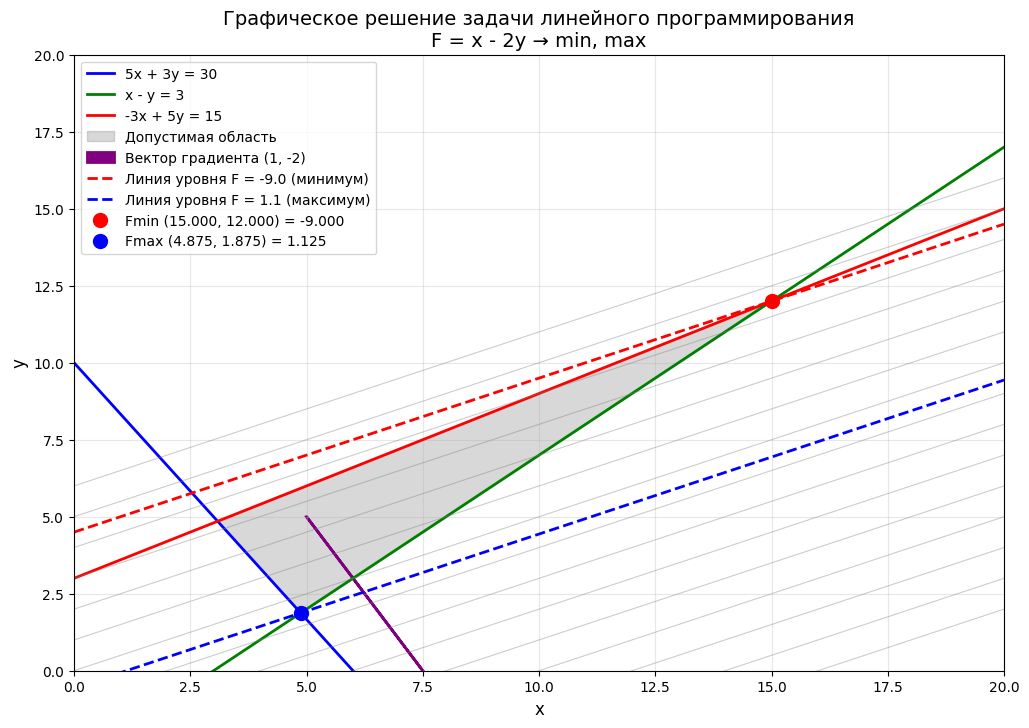

In [6]:
!pip install pulp

from pulp import *
import matplotlib.pyplot as plt
import numpy as np
import time

print("F = x - 2y → min, max")
print("При ограничениях:")
print("5x + 3y ≥ 30")
print("x - y ≤ 3")
print("-3x + 5y ≤ 15")
print("x ≥ 0, y ≥ 0")
print()

# МИНИМИЗАЦИЯ
print("МИНИМИЗАЦИЯ")
start = time.time()

x_min = LpVariable("x_min", lowBound=0)
y_min = LpVariable("y_min", lowBound=0)


problem_min = LpProblem('Minimization', LpMinimize)

# Целевая функция
problem_min += x_min - 2*y_min, "Целевая_функция"

# Ограничения
problem_min += 5*x_min + 3*y_min >= 30, "Ограничение1"
problem_min += x_min - y_min <= 3, "Ограничение2"
problem_min += -3*x_min + 5*y_min <= 15, "Ограничение3"


problem_min.solve()

x_min_val = x_min.varValue
y_min_val = y_min.varValue
f_min_val = value(problem_min.objective)

print(f"x = {x_min_val}")
print(f"y = {y_min_val}")
print(f"F_min = {f_min_val}")

end = time.time()
print(f"Время решения: {end - start:.5f} сек")
print()

# МАКСИМИЗАЦИЯ
print("МАКСИМИЗАЦИЯ")
start = time.time()

x_max = LpVariable("x_max", lowBound=0)
y_max = LpVariable("y_max", lowBound=0)

problem_max = LpProblem('Maximization', LpMaximize)

# Целевая функция
problem_max += x_max - 2*y_max, "Целевая_функция"

# Ограничения
problem_max += 5*x_max + 3*y_max >= 30, "Ограничение1"
problem_max += x_max - y_max <= 3, "Ограничение2"
problem_max += -3*x_max + 5*y_max <= 15, "Ограничение3"

problem_max.solve()

x_max_val = x_max.varValue
y_max_val = y_max.varValue
f_max_val = value(problem_max.objective)

print(f"x = {x_max_val}")
print(f"y = {y_max_val}")
print(f"F_max = {f_max_val}")

end = time.time()
print(f"Время решения: {end - start:.5f} сек")
print()

print("ГРАФИК")

x_vals = np.linspace(0, 20, 400)

# Ограничения
y1 = (30 - 5*x_vals) / 3
y2 = x_vals - 3
y3 = (15 + 3*x_vals) / 5

plt.figure(figsize=(12, 8))

# Линии ограничений
plt.plot(x_vals, y1, label='5x + 3y = 30', linewidth=2, color='blue')
plt.plot(x_vals, y2, label='x - y = 3', linewidth=2, color='green')
plt.plot(x_vals, y3, label='-3x + 5y = 15', linewidth=2, color='red')

y_min_bound = np.maximum(y1, y2)
plt.fill_between(x_vals, y_min_bound, y3,
                 where=(y_min_bound <= y3) & (x_vals >= 0) & (y_min_bound >= 0),
                 alpha=0.3, color='gray', label='Допустимая область')

gradient = np.array([1, -2])
gradient_scaled = gradient * 5

# Вектор градиента
start_point = np.array([5, 5])
plt.arrow(start_point[0], start_point[1], gradient_scaled[0], gradient_scaled[1],
          head_width=0.5, head_length=0.5, fc='purple', ec='purple', linewidth=2,
          label='Вектор градиента (1, -2)')

# Линии уровня
x_line = np.linspace(0, 20, 100)

# Для минимума
C_min = f_min_val
y_line_min = (x_line - C_min) / 2
plt.plot(x_line, y_line_min, 'r--', linewidth=2, label=f'Линия уровня F = {C_min:.1f} (минимум)')

# Для максимума
C_max = f_max_val
y_line_max = (x_line - C_max) / 2
plt.plot(x_line, y_line_max, 'b--', linewidth=2, label=f'Линия уровня F = {C_max:.1f} (максимум)')

# Дополнительные линии
for C in range(-12, 18, 2):  # от -12 до 16 с шагом 2
    y_line = (x_line - C) / 2
    plt.plot(x_line, y_line, 'gray', alpha=0.4, linewidth=0.8)

plt.plot(x_min_val, y_min_val, 'ro', markersize=10, label=f'Fmin ({x_min_val:.3f}, {y_min_val:.3f}) = {f_min_val:.3f}')
plt.plot(x_max_val, y_max_val, 'bo', markersize=10, label=f'Fmax ({x_max_val:.3f}, {y_max_val:.3f}) = {f_max_val:.3f}')

plt.xlim((0, 20))
plt.ylim((0, 20))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Графическое решение задачи линейного программирования\nF = x - 2y → min, max', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()


#**Шаг 6. Проведём анализ области допустимых решений**

In [7]:
print("АНАЛИЗ ВЕРШИН ОБЛАСТИ ДОПУСТИМЫХ РЕШЕНИЙ")
print("=" * 60)

# Находим вершины (пересечения ограничений)
vertices = []

# Пересечение 5x + 3y = 30 и x - y = 3
A1 = np.array([[5, 3], [1, -1]])
b1 = np.array([30, 3])
try:
    vertex1 = np.linalg.solve(A1, b1)
    if vertex1[0] >= 0 and vertex1[1] >= 0 and (-3*vertex1[0] + 5*vertex1[1] <= 15):
        vertices.append(vertex1)
        print(f"Вершина 1: ({vertex1[0]:.3f}, {vertex1[1]:.3f})")
        print("   (пересечение 5x + 3y = 30 и x - y = 3)")
except:
    pass

# Пересечение 5x + 3y = 30 и -3x + 5y = 15
A2 = np.array([[5, 3], [-3, 5]])
b2 = np.array([30, 15])
try:
    vertex2 = np.linalg.solve(A2, b2)
    if vertex2[0] >= 0 and vertex2[1] >= 0 and (vertex2[0] - vertex2[1] <= 3):
        vertices.append(vertex2)
        print(f"Вершина 2: ({vertex2[0]:.3f}, {vertex2[1]:.3f})")
        print("   (пересечение 5x + 3y = 30 и -3x + 5y = 15)")
except:
    pass

# Пересечение x - y = 3 и -3x + 5y = 15
A3 = np.array([[1, -1], [-3, 5]])
b3 = np.array([3, 15])
try:
    vertex3 = np.linalg.solve(A3, b3)
    if vertex3[0] >= 0 and vertex3[1] >= 0 and (5*vertex3[0] + 3*vertex3[1] >= 30):
        vertices.append(vertex3)
        print(f"Вершина 3: ({vertex3[0]:.3f}, {vertex3[1]:.3f})")
        print("   (пересечение x - y = 3 и -3x + 5y = 15)")
except:
    pass

# Вычисляем целевую функцию в вершинах
print("\nЗНАЧЕНИЯ ЦЕЛЕВОЙ ФУНКЦИИ В ВЕРШИНАХ:")
F_values = []
for i, vertex in enumerate(vertices):
    F_val = vertex[0] - 2 * vertex[1]
    F_values.append(F_val)
    print(f"Вершина {i+1}: F({vertex[0]:.3f}, {vertex[1]:.3f}) = {vertex[0]:.3f} - 2×{vertex[1]:.3f} = {F_val:.3f}")

# Находим оптимальные решения
if F_values:
    min_idx = np.argmin(F_values)
    max_idx = np.argmax(F_values)

    print("\n" + "=" * 60)
    print("ОПТИМАЛЬНЫЕ РЕШЕНИЯ:")
    print("=" * 60)
    print(f"МИНИМУМ: F_min = {F_values[min_idx]:.3f} в точке ({vertices[min_idx][0]:.3f}, {vertices[min_idx][1]:.3f})")
    print(f"МАКСИМУМ: F_max = {F_values[max_idx]:.3f} в точке ({vertices[max_idx][0]:.3f}, {vertices[max_idx][1]:.3f})")

    print("\nХАРАКТЕРИСТИКА ОБЛАСТИ:")
    print("- Форма: треугольник (3 вершины)")
    print("- Ограниченная")
    print("- Выпуклая")
    print("- Оптимум достигается в вершинах области")
else:
    print("Не найдено допустимых вершин")

АНАЛИЗ ВЕРШИН ОБЛАСТИ ДОПУСТИМЫХ РЕШЕНИЙ
Вершина 1: (4.875, 1.875)
   (пересечение 5x + 3y = 30 и x - y = 3)
Вершина 2: (3.088, 4.853)
   (пересечение 5x + 3y = 30 и -3x + 5y = 15)
Вершина 3: (15.000, 12.000)
   (пересечение x - y = 3 и -3x + 5y = 15)

ЗНАЧЕНИЯ ЦЕЛЕВОЙ ФУНКЦИИ В ВЕРШИНАХ:
Вершина 1: F(4.875, 1.875) = 4.875 - 2×1.875 = 1.125
Вершина 2: F(3.088, 4.853) = 3.088 - 2×4.853 = -6.618
Вершина 3: F(15.000, 12.000) = 15.000 - 2×12.000 = -9.000

ОПТИМАЛЬНЫЕ РЕШЕНИЯ:
МИНИМУМ: F_min = -9.000 в точке (15.000, 12.000)
МАКСИМУМ: F_max = 1.125 в точке (4.875, 1.875)

ХАРАКТЕРИСТИКА ОБЛАСТИ:
- Форма: треугольник (3 вершины)
- Ограниченная
- Выпуклая
- Оптимум достигается в вершинах области


#Решим задачу линейного программирования и построим решение в графическом виде, используя библиотеку scipy.Optimize

# **Шаг 1. Импортируем библиотеку scipy.Optimize и другие библиотеки, которые понадобятся для решения задачи**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import time

#Пояснение библиотек
$numpy$ - фундаментальная библиотека для научных вычислений в Python. Используется для работы с массивами, матрицами и математическими операциями. В контексте данной задачи необходима для решения систем линейных уравнений при нахождении вершин области.

$matplotlib.pyplot$ - библиотека для построения графиков и визуализации данных. Позволяет создавать двумерные графики, отображать линии, точки и заполненные области.

$scipy.Optimize$ - модуль библиотеки SciPy для Python, предназначенный для оптимизации функций. Он расширяет возможности NumPy, добавляя функции для работы с оптимизацией, в том числе минимизацией математических функций.

$time$ - стандартная библиотека Python для измерения времени выполнения операций. Позволяет оценить эффективность разных методов решения.

#**Шаг 2. Выпишем условие задачи - ограничения и целевую функцию**

In [9]:
print("Целевая функция: F = x - 2y → min, max")
print("Ограничения:")
print("5x + 3y ≥ 30")
print("x - y ≤ 3")
print("-3x + 5y ≤ 15")
print("x ≥ 0, y ≥ 0")

Целевая функция: F = x - 2y → min, max
Ограничения:
5x + 3y ≥ 30
x - y ≤ 3
-3x + 5y ≤ 15
x ≥ 0, y ≥ 0


#**Шаг 3. Найдём точки, при которых целевая функция будет минимальна**

In [23]:
print("\n" + "="*50)
print("МИНИМИЗАЦИЯ")
print("="*50)
start_time = time.time()

# Коэффициенты целевой функции для минимизации
c_min = [1, -2]  # F = x - 2y → min

# Матрица ограничений A_ub * x <= b_ub
# Преобразуем ограничения к форме A_ub * x <= b_ub:
# 5x + 3y ≥ 30  -> -5x - 3y <= -30
# x - y ≤ 3     -> x - y <= 3
# -3x + 5y ≤ 15 -> -3x + 5y <= 15
A_ub = [
    [-5, -3],   # -5x - 3y <= -30
    [1, -1],    # x - y <= 3
    [-3, 5]     # -3x + 5y <= 15
]
b_ub = [-30, 3, 15]

# Границы переменных
bounds = [(0, None), (0, None)]  # x ≥ 0, y ≥ 0

# Решаем задачу минимизации
result_min = linprog(c_min, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

if result_min.success:
    x_min, y_min = result_min.x
    f_min = x_min - 2 * y_min
    print(f"Оптимальное решение:")
    print(f"x = {x_min:.6f}")
    print(f"y = {y_min:.6f}")
    print(f"F_min = {x_min:.6f} - 2*{y_min:.6f} = {f_min:.6f}")
else:
    print("Решение не найдено!")
    print(result_min.message)

end_time = time.time()
print(f"Время решения: {end_time - start_time:.6f} сек")


МИНИМИЗАЦИЯ
Оптимальное решение:
x = 15.000000
y = 12.000000
F_min = 15.000000 - 2*12.000000 = -9.000000
Время решения: 0.005027 сек


#**Шаг 4. Найдём точки, при которых целевая функция будет максимальна**

In [24]:
print("\n" + "="*50)
print("МАКСИМИЗАЦИЯ")
print("="*50)
start_time = time.time()

# Для максимизации меняем знак целевой функции
c_max = [-1, 2]  # -F = -x + 2y → min

# Решаем задачу максимизации (как минимизацию -F)
result_max = linprog(c_max, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

if result_max.success:
    x_max, y_max = result_max.x
    f_max = x_max - 2 * y_max  # меняем знак обратно
    print(f"Оптимальное решение:")
    print(f"x = {x_max:.6f}")
    print(f"y = {y_max:.6f}")
    print(f"F_max = {x_max:.6f} - 2*{y_max:.6f} = {f_max:.6f}")
else:
    print("Решение не найдено!")
    print(result_max.message)

end_time = time.time()
print(f"Время решения: {end_time - start_time:.6f} сек")


МАКСИМИЗАЦИЯ
Оптимальное решение:
x = 4.875000
y = 1.875000
F_max = 4.875000 - 2*1.875000 = 1.125000
Время решения: 0.005049 сек


#**Шаг 5. Построим графическое решение задачи**


ГРАФИЧЕСКОЕ РЕШЕНИЕ


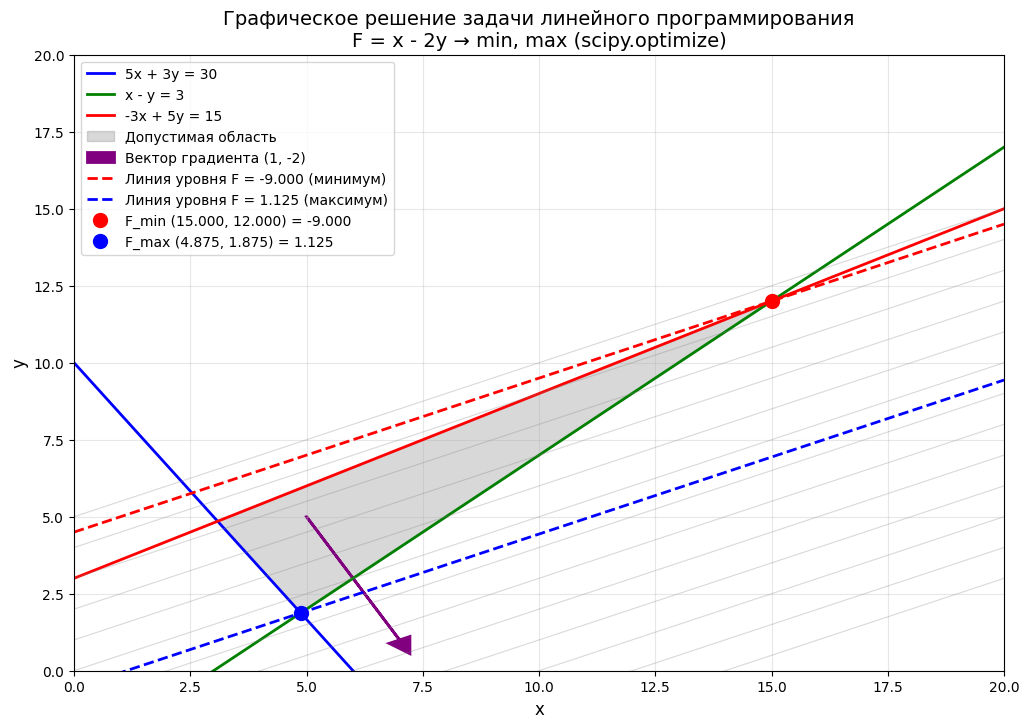

In [12]:
print("\n" + "="*50)
print("ГРАФИЧЕСКОЕ РЕШЕНИЕ")
print("="*50)

# Создаем диапазон значений x
x_vals = np.linspace(0, 20, 400)

# Вычисляем линии ограничений
y1_line = (30 - 5*x_vals) / 3  # 5x + 3y = 30
y2_line = x_vals - 3           # x - y = 3
y3_line = (15 + 3*x_vals) / 5  # -3x + 5y = 15

# Создаем график
plt.figure(figsize=(12, 8))

# Рисуем линии ограничений
plt.plot(x_vals, y1_line, label='5x + 3y = 30', linewidth=2, color='blue')
plt.plot(x_vals, y2_line, label='x - y = 3', linewidth=2, color='green')
plt.plot(x_vals, y3_line, label='-3x + 5y = 15', linewidth=2, color='red')

# Заполняем область допустимых решений
y_min_bound = np.maximum(y1_line, y2_line)
plt.fill_between(x_vals, y_min_bound, y3_line,
                 where=(y_min_bound <= y3_line) & (x_vals >= 0) & (y_min_bound >= 0),
                 alpha=0.3, color='gray', label='Допустимая область')

# Рисуем вектор градиента
gradient = np.array([1, -2])
gradient_scaled = gradient * 2
start_point = np.array([5, 5])
plt.arrow(start_point[0], start_point[1], gradient_scaled[0], gradient_scaled[1],
          head_width=0.5, head_length=0.5, fc='purple', ec='purple', linewidth=2,
          label='Вектор градиента (1, -2)')

# Рисуем линии уровня для минимума и максимума
x_line = np.linspace(0, 20, 100)

if result_min.success:
    # Линия уровня для минимума
    C_min = f_min
    y_level_min = (x_line - C_min) / 2
    plt.plot(x_line, y_level_min, 'r--', linewidth=2, label=f'Линия уровня F = {C_min:.3f} (минимум)')

if result_max.success:
    # Линия уровня для максимума
    C_max = f_max
    y_level_max = (x_line - C_max) / 2
    plt.plot(x_line, y_level_max, 'b--', linewidth=2, label=f'Линия уровня F = {C_max:.3f} (максимум)')

# Рисуем дополнительные линии уровня
for C in range(-10, 15, 2):
    y_level = (x_line - C) / 2
    plt.plot(x_line, y_level, 'gray', alpha=0.3, linewidth=0.8)

# Отмечаем оптимальные точки
if result_min.success:
    plt.plot(x_min, y_min, 'ro', markersize=10, label=f'F_min ({x_min:.3f}, {y_min:.3f}) = {f_min:.3f}')

if result_max.success:
    plt.plot(x_max, y_max, 'bo', markersize=10, label=f'F_max ({x_max:.3f}, {y_max:.3f}) = {f_max:.3f}')

# Настройки графика
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Графическое решение задачи линейного программирования\nF = x - 2y → min, max (scipy.optimize)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

#**Шаг 6. Проверим вершины области допустимых решений**

In [13]:
print("\n" + "="*50)
print("АНАЛИЗ ВЕРШИН ОБЛАСТИ ДОПУСТИМЫХ РЕШЕНИЙ")
print("="*50)

# Находим вершины (пересечения ограничений)
vertices = []

# Пересечение 5x + 3y = 30 и x - y = 3
A1 = np.array([[5, 3], [1, -1]])
b1 = np.array([30, 3])
try:
    vertex1 = np.linalg.solve(A1, b1)
    if vertex1[0] >= 0 and vertex1[1] >= 0 and (-3*vertex1[0] + 5*vertex1[1] <= 15):
        vertices.append(vertex1)
        F_val = vertex1[0] - 2 * vertex1[1]
        print(f"Вершина 1: ({vertex1[0]:.3f}, {vertex1[1]:.3f}), F = {F_val:.3f}")
except:
    pass

# Пересечение 5x + 3y = 30 и -3x + 5y = 15
A2 = np.array([[5, 3], [-3, 5]])
b2 = np.array([30, 15])
try:
    vertex2 = np.linalg.solve(A2, b2)
    if vertex2[0] >= 0 and vertex2[1] >= 0 and (vertex2[0] - vertex2[1] <= 3):
        vertices.append(vertex2)
        F_val = vertex2[0] - 2 * vertex2[1]
        print(f"Вершина 2: ({vertex2[0]:.3f}, {vertex2[1]:.3f}), F = {F_val:.3f}")
except:
    pass

# Пересечение x - y = 3 и -3x + 5y = 15
A3 = np.array([[1, -1], [-3, 5]])
b3 = np.array([3, 15])
try:
    vertex3 = np.linalg.solve(A3, b3)
    if vertex3[0] >= 0 and vertex3[1] >= 0 and (5*vertex3[0] + 3*vertex3[1] >= 30):
        vertices.append(vertex3)
        F_val = vertex3[0] - 2 * vertex3[1]
        print(f"Вершина 3: ({vertex3[0]:.3f}, {vertex3[1]:.3f}), F = {F_val:.3f}")
except:
    pass


АНАЛИЗ ВЕРШИН ОБЛАСТИ ДОПУСТИМЫХ РЕШЕНИЙ
Вершина 1: (4.875, 1.875), F = 1.125
Вершина 2: (3.088, 4.853), F = -6.618
Вершина 3: (15.000, 12.000), F = -9.000


#**Шаг 7. Итоговый результат**

In [14]:
print("\n" + "="*50)
print("ИТОГОВЫЙ РЕЗУЛЬТАТ")
print("="*50)

if result_min.success and result_max.success:
    print(f"✅ МИНИМУМ: F({x_min:.6f}, {y_min:.6f}) = {f_min:.6f}")
    print(f"✅ МАКСИМУМ: F({x_max:.6f}, {y_max:.6f}) = {f_max:.6f}")
    print(f"📊 Диапазон значений целевой функции: [{f_min:.6f}, {f_max:.6f}]")
else:
    print("❌ Решение не найдено для одной из задач")

# Проверка ответа из условия
print(f"\nПРОВЕРКА: F(15, 12) = 15 - 2*12 = {15 - 2*12}")

#**Шаг 8. Теоретическое обоснование**
print("\n" + "="*50)
print("ТЕОРЕТИЧЕСКОЕ ОБОСНОВАНИЕ")
print("="*50)
print("""
Алгоритм решения в scipy.optimize.linprog:

1. Преобразование ограничений к стандартной форме:
   - 5x + 3y ≥ 30 → -5x - 3y ≤ -30
   - x - y ≤ 3 остается без изменений
   - -3x + 5y ≤ 15 остается без изменений

2. Для минимизации используем исходные коэффициенты: c_min = [1, -2]

3. Для максимизации инвертируем коэффициенты: c_max = [-1, 2]
   (максимизация F эквивалентна минимизации -F)

4. Метод 'highs' использует revised simplex method или interior point method
   для нахождения оптимального решения в вершинах многогранника

5. Оптимальные решения всегда лежат в вершинах области допустимых решений
""")


ИТОГОВЫЙ РЕЗУЛЬТАТ
✅ МИНИМУМ: F(15.000000, 12.000000) = -9.000000
✅ МАКСИМУМ: F(4.875000, 1.875000) = 1.125000
📊 Диапазон значений целевой функции: [-9.000000, 1.125000]

ПРОВЕРКА: F(15, 12) = 15 - 2*12 = -9

ТЕОРЕТИЧЕСКОЕ ОБОСНОВАНИЕ

Алгоритм решения в scipy.optimize.linprog:

1. Преобразование ограничений к стандартной форме:
   - 5x + 3y ≥ 30 → -5x - 3y ≤ -30
   - x - y ≤ 3 остается без изменений
   - -3x + 5y ≤ 15 остается без изменений

2. Для минимизации используем исходные коэффициенты: c_min = [1, -2]

3. Для максимизации инвертируем коэффициенты: c_max = [-1, 2]
   (максимизация F эквивалентна минимизации -F)

4. Метод 'highs' использует revised simplex method или interior point method
   для нахождения оптимального решения в вершинах многогранника

5. Оптимальные решения всегда лежат в вершинах области допустимых решений



#Решим задачу линейного программирования и построим решение в графическом виде, используя библиотеку cvxopt

#**Шаг 1. Импортируем библиотеку cvxopt и другие библиотеки, которые понадобятся для решения задачи**

In [15]:
!pip install cvxopt

import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import time

#Пояснение библиотек
$numpy$ - фундаментальная библиотека для научных вычислений в Python. Используется для работы с массивами, матрицами и математическими операциями. В контексте данной задачи необходима для решения систем линейных уравнений при нахождении вершин области.

$matplotlib.pyplot$ - библиотека для построения графиков и визуализации данных. Позволяет создавать двумерные графики, отображать линии, точки и заполненные области.

$cvxopt$ - специализированная библиотека для решения задач выпуклой оптимизации, особенно для наших задач линейного программирования. Содержит эффективные алгоритмы для нахождения оптимальных решений.

$time$ - стандартная библиотека Python для измерения времени выполнения операций. Позволяет оценить эффективность разных методов решения.

#**Шаг 2. Выпишем условие задачи - ограничения и целевую функцию**

In [16]:
print("Целевая функция: F = x - 2y → min, max")
print("Ограничения:")
print("5x + 3y ≥ 30")
print("x - y ≤ 3")
print("-3x + 5y ≤ 15")
print("x ≥ 0, y ≥ 0")

Целевая функция: F = x - 2y → min, max
Ограничения:
5x + 3y ≥ 30
x - y ≤ 3
-3x + 5y ≤ 15
x ≥ 0, y ≥ 0


#**Шаг 3. Найдём точки, при которых целевая функция будет минимальна, а также вычислим её значение**

In [17]:
print("МИНИМИЗАЦИЯ")
start_time = time.time()

# Коэффициенты целевой функции для минимизации
c_min = matrix([1.0, -2.0])  # F = x - 2y

# Матрица ограничений G*x <= h
# Преобразуем ограничения к форме G*x <= h:
# 5x + 3y ≥ 30  -> -5x - 3y <= -30
# x - y ≤ 3     -> x - y <= 3
# -3x + 5y ≤ 15 -> -3x + 5y <= 15
G = matrix([
    [-5.0, -3.0],
    [1.0, -1.0],
    [-3.0, 5.0]
]).T

h = matrix([-30.0, 3.0, 15.0])

sol_min = solvers.lp(c_min, G, h)

x_min = sol_min['x'][0]
y_min = sol_min['x'][1]
f_min = sol_min['primal objective']

end_time = time.time()

print(f"Оптимальное решение:")
print(f"x = {x_min:.6f}")
print(f"y = {y_min:.6f}")
print(f"F_min = {f_min:.6f}")
print(f"Время решения: {end_time - start_time:.6f} сек")

МИНИМИЗАЦИЯ
     pcost       dcost       gap    pres   dres   k/t
 0: -6.2206e+00  6.7794e+00  6e+00  1e-17  3e+00  1e+00
 1: -6.4150e+00 -5.8747e+00  3e-01  3e-16  1e-01  2e-02
 2: -6.5499e+00 -6.1693e+00  3e-01  5e-16  1e-01  4e-02
 3: -7.3014e+00 -6.3179e+00  3e+00  4e-15  2e-01  4e-01
 4: -8.2573e+00 -7.9231e+00  1e+00  2e-15  6e-02  1e-01
 5: -8.9882e+00 -8.9625e+00  4e-02  6e-16  2e-03  2e-02
 6: -8.9999e+00 -8.9996e+00  4e-04  2e-16  2e-05  2e-04
 7: -9.0000e+00 -9.0000e+00  4e-06  8e-16  2e-07  2e-06
 8: -9.0000e+00 -9.0000e+00  4e-08  4e-16  2e-09  2e-08
Optimal solution found.
Оптимальное решение:
x = 15.000000
y = 12.000000
F_min = -9.000000
Время решения: 0.111129 сек


Целевая функция: F = x - 2y $\to$ min

Система ограничений приводится к стандартной форме для cvxopt:

5x + 3y $\geq$ 30 преобразуется в -5x - 3y ≤ -30

x - y $\leq$ 3 остается без изменений

-3x + 5y $\leq$ 15 остается без изменений

Алгоритм решения:

Формируется вектор коэффициентов целевой функции c_min = [1, -2]

Создается матрица ограничений G и вектор h

Вызывается симплекс-метод через solvers.lp()

Алгоритм находит вершину многогранника, где функция достигает минимума

Метод основан на симплекс-методе, который последовательно перебирает вершины многогранника допустимых решений, двигаясь в направлении убывания целевой функции.

#**Шаг 4. Найдём точки, при которых целевая функция будет максимальна, а также вычислим её значение**

In [18]:
print("МАКСИМИЗАЦИЯ")
start_time = time.time()

# Для максимизации меняем знак целевой функции
c_max = matrix([-1.0, 2.0])  # -F = -x + 2y

# Используем те же ограничения
sol_max = solvers.lp(c_max, G, h)

# Извлекаем результаты (меняем знак обратно)
x_max = sol_max['x'][0]
y_max = sol_max['x'][1]
f_max = -sol_max['primal objective']  # меняем знак обратно

end_time = time.time()

print(f"Оптимальное решение:")
print(f"x = {x_max:.6f}")
print(f"y = {y_max:.6f}")
print(f"F_max = {f_max:.6f}")
print(f"Время решения: {end_time - start_time:.6f} сек")

МАКСИМИЗАЦИЯ
     pcost       dcost       gap    pres   dres   k/t
 0:  6.2206e+00  2.2574e+01  8e+00  1e-17  4e+00  1e+00
 1:  5.9168e+00  1.0342e+01  2e+00  1e-16  1e+00  3e-01
 2: -6.6003e-01  6.7554e+00  1e+01  2e-16  2e+00  1e+00
 3: -9.5076e-01 -7.6953e-01  3e-01  2e-16  4e-02  2e-02
 4: -1.1233e+00 -1.1215e+00  3e-03  3e-16  5e-04  2e-04
 5: -1.1250e+00 -1.1250e+00  3e-05  3e-16  5e-06  2e-06
 6: -1.1250e+00 -1.1250e+00  3e-07  3e-16  5e-08  2e-08
Optimal solution found.
Оптимальное решение:
x = 4.875000
y = 1.875000
F_max = 1.125000
Время решения: 0.003702 сек


Максимизация F = x - 2y эквивалентна минимизации -F = -x + 2y

Обоснование:

Если F* - максимальное значение F, то -F* - минимальное значение -F

После нахождения минимума -F меняем знак для получения максимума F

Вычислительный процесс:

Инвертируем коэффициенты целевой функции

Решаем задачу минимизации для инвертированной функции

Восстанавливаем оригинальное значение максимума

#**Шаг 5. Построим графическое решение задачи**

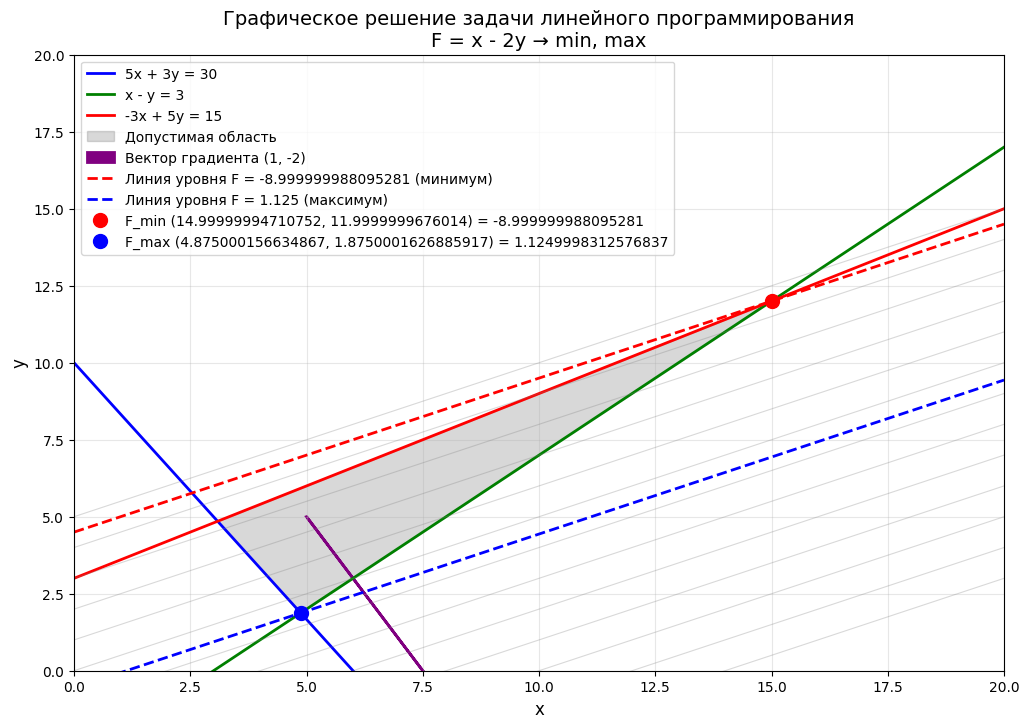

ВЫВОД:
Для достижения минимального значения F = -8.999999988095281 необходимо:
x = 14.99999994710752, y = 11.9999999676014
Для достижения максимального значения F = 1.1249998312576837 необходимо:
x = 4.875000156634867, y = 1.8750001626885917


In [20]:
x_vals = np.linspace(0, 20, 400)

y1_line = (30 - 5*x_vals) / 3  # 5x + 3y = 30
y2_line = x_vals - 3           # x - y = 3
y3_line = (15 + 3*x_vals) / 5  # -3x + 5y = 15

plt.figure(figsize=(12, 8))

plt.plot(x_vals, y1_line, label='5x + 3y = 30', linewidth=2, color='blue')
plt.plot(x_vals, y2_line, label='x - y = 3', linewidth=2, color='green')
plt.plot(x_vals, y3_line, label='-3x + 5y = 15', linewidth=2, color='red')

y_min_bound = np.maximum(y1_line, y2_line)
plt.fill_between(x_vals, y_min_bound, y3_line,
                 where=(y_min_bound <= y3_line) & (x_vals >= 0) & (y_min_bound >= 0),
                 alpha=0.3, color='gray', label='Допустимая область')

gradient = np.array([1, -2])
gradient_scaled = gradient * 5
start_point = np.array([5, 5])
plt.arrow(start_point[0], start_point[1], gradient_scaled[0], gradient_scaled[1],
          head_width=0.5, head_length=0.5, fc='purple', ec='purple', linewidth=2,
          label='Вектор градиента (1, -2)')

x_line = np.linspace(0, 20, 100)

C_min = f_min
y_level_min = (x_line - C_min) / 2
plt.plot(x_line, y_level_min, 'r--', linewidth=2, label=f'Линия уровня F = {C_min} (минимум)')

C_max = f_max
y_level_max = (x_line - C_max) / 2
plt.plot(x_line, y_level_max, 'b--', linewidth=2, label=f'Линия уровня F = {C_max:.3f} (максимум)')

for C in range(-10, 15, 2):
    y_level = (x_line - C) / 2
    plt.plot(x_line, y_level, 'gray', alpha=0.3, linewidth=0.8)

plt.plot(x_min, y_min, 'ro', markersize=10, label=f'F_min ({x_min}, {y_min}) = {f_min}')
plt.plot(x_max, y_max, 'bo', markersize=10, label=f'F_max ({x_max}, {y_max}) = {f_max}')

plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Графическое решение задачи линейного программирования\nF = x - 2y → min, max', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

print("ВЫВОД:")
print(f"Для достижения минимального значения F = {f_min} необходимо:")
print(f"x = {x_min}, y = {y_min}")
print(f"Для достижения максимального значения F = {f_max} необходимо:")
print(f"x = {x_max}, y = {y_max}")

#**Код целиком**

Целевая функция: F = x - 2y → min, max
Ограничения:
5x + 3y ≥ 30
x - y ≤ 3
-3x + 5y ≤ 15
x ≥ 0, y ≥ 0

МИНИМИЗАЦИЯ
     pcost       dcost       gap    pres   dres   k/t
 0: -6.2206e+00  6.7794e+00  6e+00  1e-17  3e+00  1e+00
 1: -6.4150e+00 -5.8747e+00  3e-01  3e-16  1e-01  2e-02
 2: -6.5499e+00 -6.1693e+00  3e-01  5e-16  1e-01  4e-02
 3: -7.3014e+00 -6.3179e+00  3e+00  4e-15  2e-01  4e-01
 4: -8.2573e+00 -7.9231e+00  1e+00  2e-15  6e-02  1e-01
 5: -8.9882e+00 -8.9625e+00  4e-02  6e-16  2e-03  2e-02
 6: -8.9999e+00 -8.9996e+00  4e-04  2e-16  2e-05  2e-04
 7: -9.0000e+00 -9.0000e+00  4e-06  8e-16  2e-07  2e-06
 8: -9.0000e+00 -9.0000e+00  4e-08  4e-16  2e-09  2e-08
Optimal solution found.
Оптимальное решение:
x = 15.000000
y = 12.000000
F_min = -9.000000
Время решения: 0.002440 сек
МАКСИМИЗАЦИЯ
     pcost       dcost       gap    pres   dres   k/t
 0:  6.2206e+00  2.2574e+01  8e+00  1e-17  4e+00  1e+00
 1:  5.9168e+00  1.0342e+01  2e+00  1e-16  1e+00  3e-01
 2: -6.6003e-01  6.7554e+00  

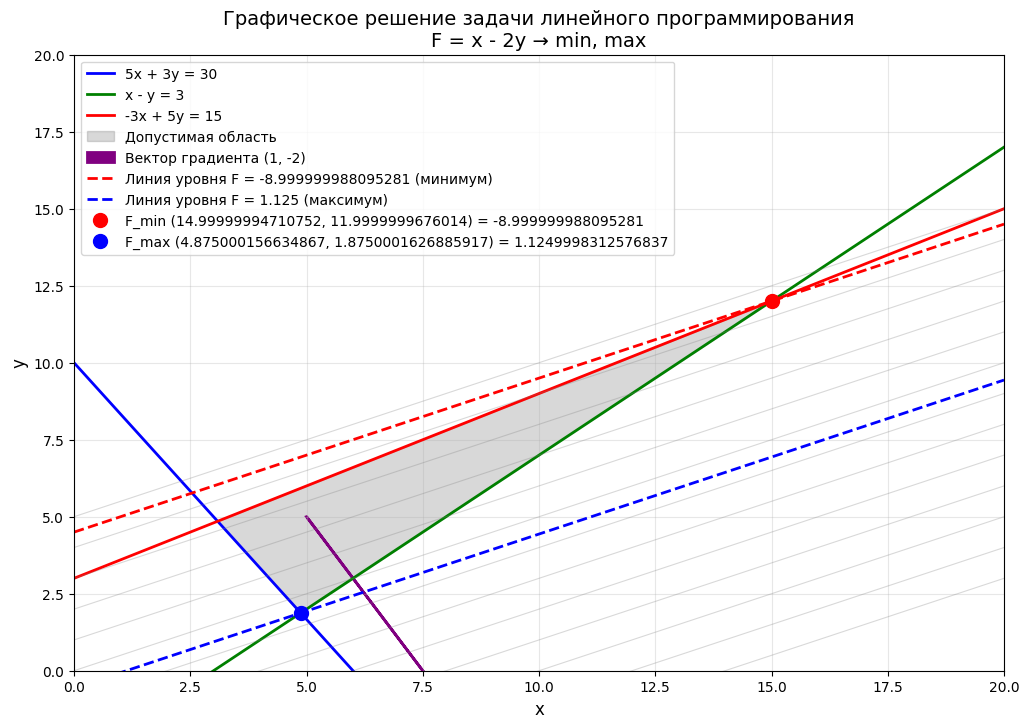

ВЫВОД:
Для достижения минимального значения F = -8.999999988095281 необходимо:
x = 14.99999994710752, y = 11.9999999676014
Для достижения максимального значения F = 1.1249998312576837 необходимо:
x = 4.875000156634867, y = 1.8750001626885917


In [21]:
!pip install cvxopt

import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import time

print("Целевая функция: F = x - 2y → min, max")
print("Ограничения:")
print("5x + 3y ≥ 30")
print("x - y ≤ 3")
print("-3x + 5y ≤ 15")
print("x ≥ 0, y ≥ 0")
print()

# МИНИМИЗАЦИЯ
print("МИНИМИЗАЦИЯ")
start_time = time.time()

# Коэффициенты целевой функции для минимизации
c_min = matrix([1.0, -2.0])  # F = x - 2y

# Матрица ограничений G*x <= h
# Преобразуем ограничения к форме G*x <= h:
# 5x + 3y ≥ 30  -> -5x - 3y <= -30
# x - y ≤ 3     -> x - y <= 3
# -3x + 5y ≤ 15 -> -3x + 5y <= 15
G = matrix([
    [-5.0, -3.0],
    [1.0, -1.0],
    [-3.0, 5.0]
]).T

h = matrix([-30.0, 3.0, 15.0])

sol_min = solvers.lp(c_min, G, h)

x_min = sol_min['x'][0]
y_min = sol_min['x'][1]
f_min = sol_min['primal objective']

end_time = time.time()

print(f"Оптимальное решение:")
print(f"x = {x_min:.6f}")
print(f"y = {y_min:.6f}")
print(f"F_min = {f_min:.6f}")
print(f"Время решения: {end_time - start_time:.6f} сек")

# МАКСИМИЗАЦИЯ
print("МАКСИМИЗАЦИЯ")
start_time = time.time()

# Для максимизации меняем знак целевой функции
c_max = matrix([-1.0, 2.0])  # -F = -x + 2y

# Используем те же ограничения
sol_max = solvers.lp(c_max, G, h)

# Извлекаем результаты (меняем знак обратно)
x_max = sol_max['x'][0]
y_max = sol_max['x'][1]
f_max = -sol_max['primal objective']  # меняем знак обратно

end_time = time.time()

print(f"Оптимальное решение:")
print(f"x = {x_max:.6f}")
print(f"y = {y_max:.6f}")
print(f"F_max = {f_max:.6f}")
print(f"Время решения: {end_time - start_time:.6f} сек")

x_vals = np.linspace(0, 20, 400)

y1_line = (30 - 5*x_vals) / 3  # 5x + 3y = 30
y2_line = x_vals - 3           # x - y = 3
y3_line = (15 + 3*x_vals) / 5  # -3x + 5y = 15

plt.figure(figsize=(12, 8))

plt.plot(x_vals, y1_line, label='5x + 3y = 30', linewidth=2, color='blue')
plt.plot(x_vals, y2_line, label='x - y = 3', linewidth=2, color='green')
plt.plot(x_vals, y3_line, label='-3x + 5y = 15', linewidth=2, color='red')

y_min_bound = np.maximum(y1_line, y2_line)
plt.fill_between(x_vals, y_min_bound, y3_line,
                 where=(y_min_bound <= y3_line) & (x_vals >= 0) & (y_min_bound >= 0),
                 alpha=0.3, color='gray', label='Допустимая область')

gradient = np.array([1, -2])
gradient_scaled = gradient * 5
start_point = np.array([5, 5])
plt.arrow(start_point[0], start_point[1], gradient_scaled[0], gradient_scaled[1],
          head_width=0.5, head_length=0.5, fc='purple', ec='purple', linewidth=2,
          label='Вектор градиента (1, -2)')

x_line = np.linspace(0, 20, 100)

C_min = f_min
y_level_min = (x_line - C_min) / 2
plt.plot(x_line, y_level_min, 'r--', linewidth=2, label=f'Линия уровня F = {C_min} (минимум)')

C_max = f_max
y_level_max = (x_line - C_max) / 2
plt.plot(x_line, y_level_max, 'b--', linewidth=2, label=f'Линия уровня F = {C_max:.3f} (максимум)')

for C in range(-10, 15, 2):
    y_level = (x_line - C) / 2
    plt.plot(x_line, y_level, 'gray', alpha=0.3, linewidth=0.8)

plt.plot(x_min, y_min, 'ro', markersize=10, label=f'F_min ({x_min}, {y_min}) = {f_min}')
plt.plot(x_max, y_max, 'bo', markersize=10, label=f'F_max ({x_max}, {y_max}) = {f_max}')

plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Графическое решение задачи линейного программирования\nF = x - 2y → min, max', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

print("ВЫВОД:")
print(f"Для достижения минимального значения F = {f_min} необходимо:")
print(f"x = {x_min}, y = {y_min}")
print(f"Для достижения максимального значения F = {f_max} необходимо:")
print(f"x = {x_max}, y = {y_max}")

#**Шаг 6. Проведём анализ области допустимых значений**

In [22]:
# Анализ вершин многогранника ограничений
print("\n" + "=" * 50)
print("АНАЛИЗ ВЕРШИН ОБЛАСТИ ДОПУСТИМЫХ РЕШЕНИЙ")
print("=" * 50)

# Находим вершины (пересечения ограничений)
vertices = []

# Пересечение 5x + 3y = 30 и x - y = 3
A1 = np.array([[5, 3], [1, -1]])
b1 = np.array([30, 3])
try:
    vertex1 = np.linalg.solve(A1, b1)
    if vertex1[0] >= 0 and vertex1[1] >= 0 and (-3*vertex1[0] + 5*vertex1[1] <= 15):
        vertices.append(vertex1)
        print(f"Вершина 1: ({vertex1[0]:.3f}, {vertex1[1]:.3f})")
except:
    pass

# Пересечение 5x + 3y = 30 и -3x + 5y = 15
A2 = np.array([[5, 3], [-3, 5]])
b2 = np.array([30, 15])
try:
    vertex2 = np.linalg.solve(A2, b2)
    if vertex2[0] >= 0 and vertex2[1] >= 0 and (vertex2[0] - vertex2[1] <= 3):
        vertices.append(vertex2)
        print(f"Вершина 2: ({vertex2[0]:.3f}, {vertex2[1]:.3f})")
except:
    pass

# Пересечение x - y = 3 и -3x + 5y = 15
A3 = np.array([[1, -1], [-3, 5]])
b3 = np.array([3, 15])
try:
    vertex3 = np.linalg.solve(A3, b3)
    if vertex3[0] >= 0 and vertex3[1] >= 0 and (5*vertex3[0] + 3*vertex3[1] >= 30):
        vertices.append(vertex3)
        print(f"Вершина 3: ({vertex3[0]:.3f}, {vertex3[1]:.3f})")
except:
    pass

# Вычисляем целевую функцию в вершинах
print("\nЗНАЧЕНИЯ ЦЕЛЕВОЙ ФУНКЦИИ В ВЕРШИНАХ:")
F_values = []
for i, vertex in enumerate(vertices):
    F_val = vertex[0] - 2 * vertex[1]
    F_values.append(F_val)
    print(f"Вершина {i+1}: F({vertex[0]:.3f}, {vertex[1]:.3f}) = {vertex[0]:.3f} - 2×{vertex[1]:.3f} = {F_val:.3f}")

# Находим минимум и максимум
if F_values:
    min_idx = np.argmin(F_values)
    max_idx = np.argmax(F_values)

    print("\n" + "=" * 50)
    print("ОПТИМАЛЬНЫЕ РЕШЕНИЯ:")
    print("=" * 50)
    print(f"МИНИМУМ: F_min = {F_values[min_idx]:.3f} в точке ({vertices[min_idx][0]:.3f}, {vertices[min_idx][1]:.3f})")
    print(f"МАКСИМУМ: F_max = {F_values[max_idx]:.3f} в точке ({vertices[max_idx][0]:.3f}, {vertices[max_idx][1]:.3f})")


АНАЛИЗ ВЕРШИН ОБЛАСТИ ДОПУСТИМЫХ РЕШЕНИЙ
Вершина 1: (4.875, 1.875)
Вершина 2: (3.088, 4.853)
Вершина 3: (15.000, 12.000)

ЗНАЧЕНИЯ ЦЕЛЕВОЙ ФУНКЦИИ В ВЕРШИНАХ:
Вершина 1: F(4.875, 1.875) = 4.875 - 2×1.875 = 1.125
Вершина 2: F(3.088, 4.853) = 3.088 - 2×4.853 = -6.618
Вершина 3: F(15.000, 12.000) = 15.000 - 2×12.000 = -9.000

ОПТИМАЛЬНЫЕ РЕШЕНИЯ:
МИНИМУМ: F_min = -9.000 в точке (15.000, 12.000)
МАКСИМУМ: F_max = 1.125 в точке (4.875, 1.875)


#**Вывод**
Мы решили одну задачу с помощью трёх библиотек - pulp, scipy.Optimize, cvxopt. Выпишем полученные значения и время выполнения при использовании каждой библиотеки:

| Метод | x | y | F | Время (сек) |
|-------|---|---|---|-------------|
| PuLP (min) | 15.000 | 12.000 | -9.000 | 0.0092 |
| PuLP (max) | 4.875 | 1.875 | 1.125 | 0.0093 |
| scipy.Optimize (min) | 15.000 | 12.000 | -9.000 | 0.005027 |
| scipy.Optimize (max) | 4.875 | 1.875 | 1.125 | 0.005049 |
| cvxopt (min) | 15.000 | 12.000 | -9.000 | 0.005252 |
| cvxopt (max) | 4.875 | 1.875 | 1.125 | 0.011074 |